In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras.applications import EfficientNetB0

import os
import math
import random

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.losses as losses
from glob import glob


os.environ['CUDA_VISIBLE_DEVICES'] = '1'

# Image classification

# Image Segmentation
### Semantic Segmentation
### Instance Segmentation

# Intersection over Union(IoU)  
* Intersection over Union는 object detection에서 사용하는 도구  
* 객체 인식 모델의 성능 평가를 하는 과정에서 사용되는 도구  
* IoU = 교집합 영역의 넓이 / 합집합 영역의 넓이

# Dice coefficient
* Image segmentation 이후 성능 평가시 사용되는 지표
* 0, 1 사이의 값으로 나타남
* Dice coefficient 최적화에 IoU보다 성능이 우수
* Dice = 2 * Intersection / Prediction + Ground Truth

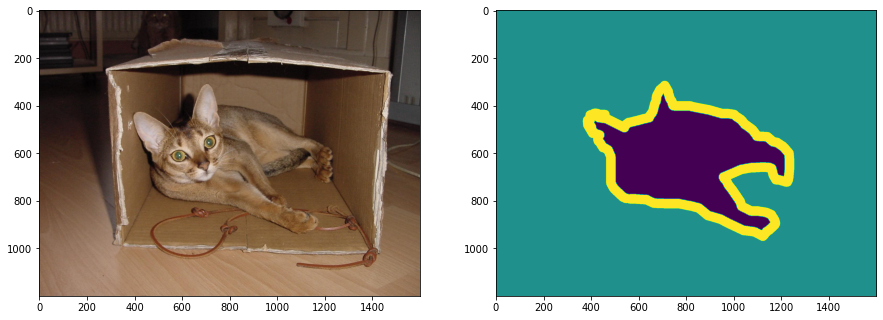

In [2]:
# trimaps/ 	Trimap annotations for every image in the dataset
# Pixel Annotations: 1: Foreground 2:Background 3: Not classified

image_files = glob('data/images/*.jpg')
image_path = image_files[134]
seg_path = image_path.replace('images', 'annotations/trimaps')
seg_path = seg_path.replace('jpg', 'png')

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
seg_map = cv2.imread(seg_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(seg_map)
plt.show()

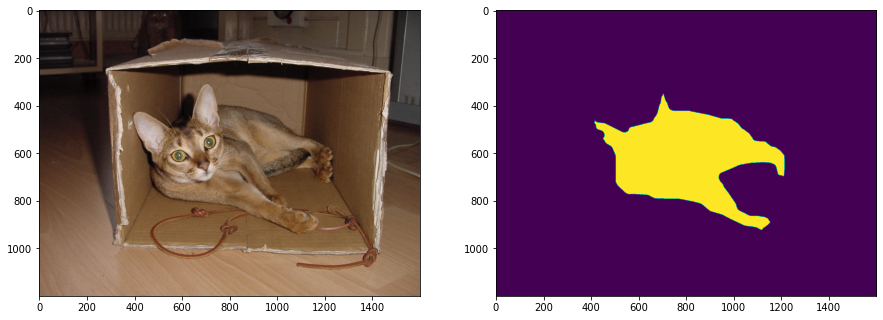

In [3]:
seg_map[seg_map != 1] = 0

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(seg_map)
plt.show()

In [4]:
def iou(y_true, y_pred):
    smooth = 0.
    
    y_true = tf.reshape(y_true, [-1])
    y_pred = tf.reshape(y_pred, [-1])

    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) - intersection

    score = intersection / (union + smooth)
    return score

def dice_coef(y_true, y_pred):
    smooth = 0.

    y_true = tf.reshape(y_true, [-1])
    y_pred = tf.reshape(y_pred, [-1])

    intersection = tf.reduce_sum(y_true * y_pred)
    score = (2 * intersection) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) +smooth)
    return score

def dice_loss(y_true, y_pred):
    loss = 1 - dice_coef(y_true, y_pred)

    return loss

def bce_dice_loss(y_true, y_pred):
    loss = 1.* losses.binary_crossentropy(y_true, y_pred) + 1.* dice_loss(y_true, y_pred)
    return loss

In [5]:
print(dice_coef(seg_map.astype('float32'), seg_map.astype('float32')).numpy())
print(iou(seg_map.astype('float32'), seg_map.astype('float32')).numpy())

1.0
1.0


In [6]:
zeros = np.zeros_like(seg_map)
print(dice_coef(seg_map.astype('float32'), zeros.astype('float32')).numpy())
print(iou(seg_map.astype('float32'), zeros.astype('float32')).numpy())

0.0
0.0


In [7]:
ones = np.ones_like(seg_map)
print(dice_coef(seg_map.astype('float32'), ones.astype('float32')).numpy())
print(iou(seg_map.astype('float32'), ones.astype('float32')).numpy())

0.1942082
0.107547395
